In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import glob
import re
import datetime
import seaborn as sns

In [70]:
##1. Import des trainsets contenant les infos des biens déjà vendus. Ils contiennent les colonnes avec id du bien,
## date de la transaction et l'errer faite entre le prix estimé et le vrai prix. Environ 90k et 77k lignes.

In [6]:
path16 = 'C:/Users/Anastasiia/Documents/BigData-IA/all/train_2016_v2.csv' #trainset 2016 avec id du bien, date, logerr
dataset1 = pd.read_csv(path16, delimiter=',', header=0, index_col=None)
df16 = pd.DataFrame(dataset1)
df16.describe()
#df.dtypes
#df.index
#df.columns
path17 = 'C:/Users/Anastasiia/Documents/BigData-IA/all/train_2017.csv'  #trainset 2017 avec id du bien, date, logerr
dataset2 = pd.read_csv(path17, delimiter=',', header=0, index_col=None)
df17 = pd.DataFrame(dataset2)
df17.describe()

,parcelid,logerror
count,7.761300e+04,77613.000000
mean,1.300781e+07,0.016755
std,3.518717e+06,0.170887
min,1.071186e+07,-4.655420
25%,1.153821e+07,-0.024325
50%,1.253004e+07,0.006670
75%,1.421101e+07,0.039295
max,1.676893e+08,5.262999


In [ ]:
## 2. Import des tables contenant les propriétés des biens (vendus ou non en 2016 et 2017, respectivement). 
## 54 paramètres et environ 3M de lignes

In [7]:
path_p16 = 'C:/Users/Anastasiia/Documents/BigData-IA/all/properties_2016.csv'
dataset_p16 = pd.read_csv(path_p16, delimiter=',', header=0, index_col=None)
path_p17 = 'C:/Users/Anastasiia/Documents/BigData-IA/all/properties_2017.csv'
dataset_p17 = pd.read_csv(path_p17, delimiter=',', header=0, index_col=None)

C:\Users\Anastasiia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Anastasiia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
##3. Jointure entre lea table de propriétés et la table des transactions. train1 et train2 correspondent à 2016 et 2017,
## respectivement

In [8]:
train1 = pd.merge(df16, dataset_p16, how = 'left', on = 'parcelid')
train1.rename(columns={"logerror":"logerror_2016"}, inplace=True)
train1.describe()

,parcelid,logerror_2016,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


In [9]:
train2 = pd.merge(df17, dataset_p17, how = 'left', on = 'parcelid')
train2.rename(columns={"logerror":"logerror_2017"}, inplace=True)
train2.describe(include='all')


,parcelid,logerror_2017,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,7.761300e+04,77613.000000,77613,25007.000000,207.000000,50.000000,77579.000000,77579.000000,15.000000,49809.000000,...,17599.000000,172,7.746400e+04,7.757800e+04,77579.0,7.757700e+04,77574.000000,2900,2900.000000,7.733200e+04
unique,NaN,NaN,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,1195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,172,NaN,NaN,NaN,NaN,NaN,2900,NaN,NaN
mean,1.300781e+07,0.016755,NaN,1.812013,7.386473,679.720000,2.298496,3.053223,3.933333,6.533779,...,1.434286,NaN,1.892811e+05,4.901506e+05,2016.0,3.011515e+05,5995.961788,NaN,14.088276,6.049667e+13
std,3.518717e+06,0.170887,NaN,2.965768,2.728030,689.703546,0.996732,1.140480,0.258199,1.722062,...,0.544515,NaN,2.304107e+05,6.537979e+05,0.0,4.927249e+05,7628.859728,NaN,2.181281,1.533339e+12
min,1.071186e+07,-4.655420,NaN,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,NaN,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,NaN,3.000000,6.037101e+13
25%,1.153821e+07,-0.024325,NaN,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,...,1.000000,NaN,8.417925e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,NaN,14.000000,6.037311e+13
50%,1.253004e+07,0.006670,NaN,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,...,1.000000,NaN,1.364045e+05,3.588785e+05,2016.0,2.031880e+05,4448.265000,NaN,15.000000,6.037603e+13
75%,1.421101e+07,0.039295,NaN,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,...,2.000000,NaN,2.187340e+05,5.690000e+05,2016.0,3.667530e+05,6926.917500,NaN,15.000000,6.059042e+13


In [10]:
train = pd.concat([train1,train2]) # cette partie n'est pas vraiment necéssaire
pd.set_option('display.max_columns', 500)
train.describe()

,airconditioningtypeid,architecturalstyletypeid,assessmentyear,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,censustractandblock,decktypeid,finishedfloor1squarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,landtaxvaluedollarcnt,latitude,logerror_2016,logerror_2017,longitude,lotsizesquarefeet,numberofstories,parcelid,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,structuretaxvaluedollarcnt,taxamount,taxdelinquencyyear,taxvaluedollarcnt,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt
count,53788.000000,468.000000,167854.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,166992.000000,1.670020e+05,1272.0,12893.000000,159519.000000,75.000000,6591.000000,12893.000000,807.000000,167854.000000,17896.000000,166056.000000,55457.000000,55457.000000,105651.000000,1.678510e+05,1.678540e+05,90275.000000,77613.000000,1.678540e+05,1.494460e+05,38169.000000,1.678880e+05,34075.0,1838.000000,1626.0,2278.0,31776.0,167854.000000,1.678540e+05,164579.000000,167854.000000,66986.000000,167769.000000,167854.000000,93.0,1.673590e+05,167843.000000,4683.000000,1.678520e+05,22115.000000,522.000000,109056.000000,5039.000000,165.000000,166828.000000
mean,1.814345,7.299145,2015.462181,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,1778.630246,6.049390e+13,66.0,1356.491895,1752.326939,1395.706667,2368.333485,1367.647018,2197.294919,6048.844484,1.189428,2.245345,1.813513,347.603909,3.924525,2.888805e+05,3.400678e+07,0.011457,0.016755,-1.182011e+08,2.951060e+04,1.437764,1.299536e+07,1.0,518.930903,1.0,1.0,1.0,261.828619,6.049154e+07,33725.134525,2529.623923,189295.685382,96586.390722,1.477480,7.0,1.843460e+05,5989.515575,13.827247,4.726833e+05,1.009134,6.022989,1.110365,307.919032,271.260606,1968.569311
std,2.970239,2.719633,0.498569,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,940.356025,1.054137e+12,0.0,661.068564,921.360898,116.539145,1124.302411,698.669027,1300.554048,20.702187,0.487327,0.964703,0.599447,264.565618,3.642599,4.456451e+05,2.651175e+05,0.161079,0.170887,3.600586e+05,1.224588e+05,0.544508,3.016071e+06,0.0,155.732980,0.0,0.0,0.0,5.163838,2.054437e+05,46922.468867,803.745176,165687.734522,3723.009458,2.821496,0.0,2.192841e+05,7214.731946,2.421658,6.028372e+05,0.109294,0.491236,0.988168,227.430960,293.611447,23.777202
min,1.000000,2.000000,2015.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000,6.037101e+13,66.0,44.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.200000e+01,3.333930e+07,-4.605000,-4.655420,-1.194754e+08,1.670000e+02,1.000000,1.071174e+07,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,4.400000e+01,19.920000,3.000000,2.200000e+01,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000
25%,1.000000,7.000000,2015.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1183.000000,6.037312e+13,66.0,945.000000,1172.000000,1344.000000,1634.000000,945.000000,1057.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,8.373000e+04,3.381292e+07,-0.025300,-0.024325,-1.184130e+08,5.702000e+03,1.000000,1.154899e+07,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037312e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,8.256800e+04,2798.070000,13.000000,2.026522e+05,1.000000,6.000000,1.000000,175.000000,88.000000,1953.000000
50%,1.000000,7.000000,2015.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,1541.000000,6.037604e+13,66.0,1252.000000,1520.000000,1440.000000,2099.000000,1252.000000,1886.00000

In [24]:
train2.head(40)

,parcelid,logerror_2017,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13
5,17143294,-0.020526,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,842.0,1492.0,1492.0,NaN,NaN,842.0,NaN,6111.0,1.0,2.0,2.0,0.0,NaN,NaN,34230044.0,-118993991.0,903.0,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111005e+07,51239.0,2061.0,NaN,97091.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,2.0,NaN,198640.0,331064.0,2016.0,132424.0,3508.10,NaN,NaN,6.111005e+13
6,12095076,-0.001011,2017-01-01,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,NaN,NaN,2962.0,2962.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34145202.0,-118179824.0,63000.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,PSR2,6.037461e+07,47019.0,3101.0,274684.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13
7,12069064,0.101723,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,5.0,1.0,NaN,NaN,738.0,738.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,NaN,34149214.0,-118239357.0,4214.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,GLR4YY,6.037302e+07,45457.0,3101.0,276258.0,96325.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1922.0,NaN,NaN,18890.0,218552.0,2016.0,199662.0,2366.08,NaN,NaN,6.037302e+13
8,12790562,-0.040966,2017-01-02,NaN,NaN,NaN,3.0,4.0,NaN,9.0,3.0,NaN,NaN,3039.0,3039.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,33960230.0,-118006914.0,20028.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,WHRE20000*,6.037500

In [12]:
train2.describe()

,parcelid,logerror_2017,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,7.761300e+04,77613.000000,25007.000000,207.000000,50.000000,77579.000000,77579.000000,15.000000,49809.000000,76963.000000,614.0,6037.000000,77378.000000,73923.000000,42.000000,3027.000000,6037.000000,386.000000,77579.000000,8289.000000,76963.000000,25520.000000,25520.000000,49571.000000,7.757900e+04,7.757900e+04,6.932100e+04,16174.0,869.000000,465.0,1074.0,15079.0,77579.000000,7.757900e+04,76107.000000,77579.000000,30974.000000,77529.000000,77579.000000,50.0,10106.000000,223.000000,50703.000000,2393.000000,70.000000,77309.000000,17599.000000,7.746400e+04,7.757800e+04,77579.0,7.757700e+04,77574.000000,2900.000000,7.733200e+04
mean,1.300781e+07,0.016755,1.812013,7.386473,679.720000,2.298496,3.053223,3.933333,6.533779,2.316392,66.0,1366.165314,1784.935421,1760.284553,1388.761905,2354.491245,1381.388935,2082.500000,6048.814151,1.191217,2.250107,1.815282,350.047061,3.921749,3.400837e+07,-1.182037e+08,2.997344e+04,1.0,517.930955,1.0,1.0,1.0,261.824476,6.049124e+07,33683.055107,2534.514933,187725.110544,96586.692812,1.476276,7.0,1.009598,6.040359,1.110309,305.460928,216.385714,1968.611507,1.434286,1.892811e+05,4.901506e+05,2016.0,3.011515e+05,5995.961788,14.088276,6.049667e+13
std,3.518717e+06,0.170887,2.965768,2.728030,689.703546,0.996732,1.140480,0.258199,1.722062,0.979689,0.0,670.701336,954.250373,934.352566,122.220874,1186.985442,725.792665,1240.382784,20.747252,0.490980,0.966492,0.588340,261.646070,3.594780,2.652873e+05,3.594085e+05,1.233050e+05,0.0,156.569664,0.0,0.0,0.0,5.141596,2.058962e+05,47211.780350,801.447913,165045.086058,3793.552065,2.823686,0.0,0.118572,0.556035,1.169967,238.735241,190.177514,23.793171,0.544515,2.304107e+05,6.537979e+05,0.0,4.927249e+05,7628.859728,2.181281,1.533339e+12
min,1.071186e+07,-4.655420,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13
25%,1.153821e+07,-0.024325,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1624.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381463e+07,-1.184150e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,8.417925e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,14.000000,6.037311e+13
50%,1.253004e+07,0.006670,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,1257.000000,1542.000000,1523.000000,1440.000000,2088.000000,1259.000000,1812.500000,6037.000000,1.000000,2.000000,2.000000,436.000000,2.000000,3.402200e+07,-1.181810e+08,7.206000e+03,1.0,500.000000

In [25]:
train2_clean = train2.copy()
train2_clean["transactiondate"] = pd.to_datetime(train2["transactiondate"],format='%Y-%m-%d')
#train2_clean["propertycountylandusecode"]=train2["propertycountylandusecode"].astype(float)
train2_clean.dtypes

parcelid                                 int64
logerror_2017                          float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

In [18]:
train2.dtypes

parcelid                          int64
logerror_2017                   float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [ ]:
##4. Analyse exploratoire

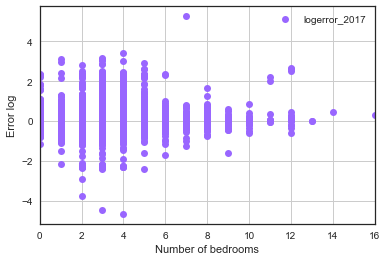

In [136]:
plt.figure()
train2.plot(x='bedroomcnt', y='logerror_2017', c = '#9966ff', marker = 'o', linewidth = 0)
plt.xlim([0, 16])
plt.grid()
plt.xlabel('Number of bedrooms')
plt.ylabel('Error log')
plt.show()

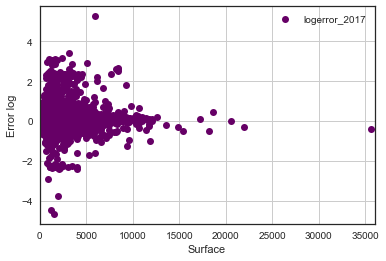

In [143]:
plt.figure()
train2.plot(x='calculatedfinishedsquarefeet', y='logerror_2017', c = '#660066', marker = 'o', linewidth = 0)
plt.xlim([0, 36000])
plt.grid()
plt.xlabel('Surface')
plt.ylabel('Error log')
plt.show()

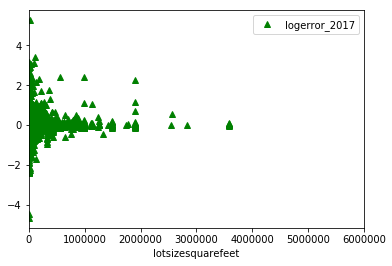

In [68]:
plt.figure()
train2.plot(x='lotsizesquarefeet', y='logerror_2017', style = 'g^')
plt.xlim([0, 6000000])
plt.show()

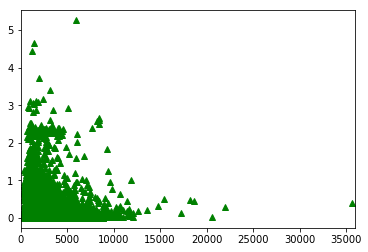

In [66]:
plt.figure()
x = train2["calculatedfinishedsquarefeet"]
y = abs(train2["logerror_2017"])
plt.plot(x, y, 'g^')
plt.xlim([0, 3600])
plt.show()

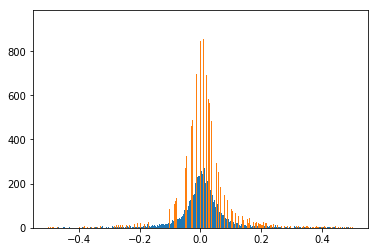

In [38]:
plt.hist(train2["logerror_2017"], bins = 3000, range = [-0.5,0.5])
plt.hist(train1["logerror_2016"], bins = 3000, range = [-0.5,0.5])
plt.show()
#n, b, patches = plt.hist(train2["logerror_2017"], bins = 3000, range = [-0.5,0.5])
#plt.show()
#bin_max = np.where(n == n.max())
#print('maxbin', b[bin_max][0])


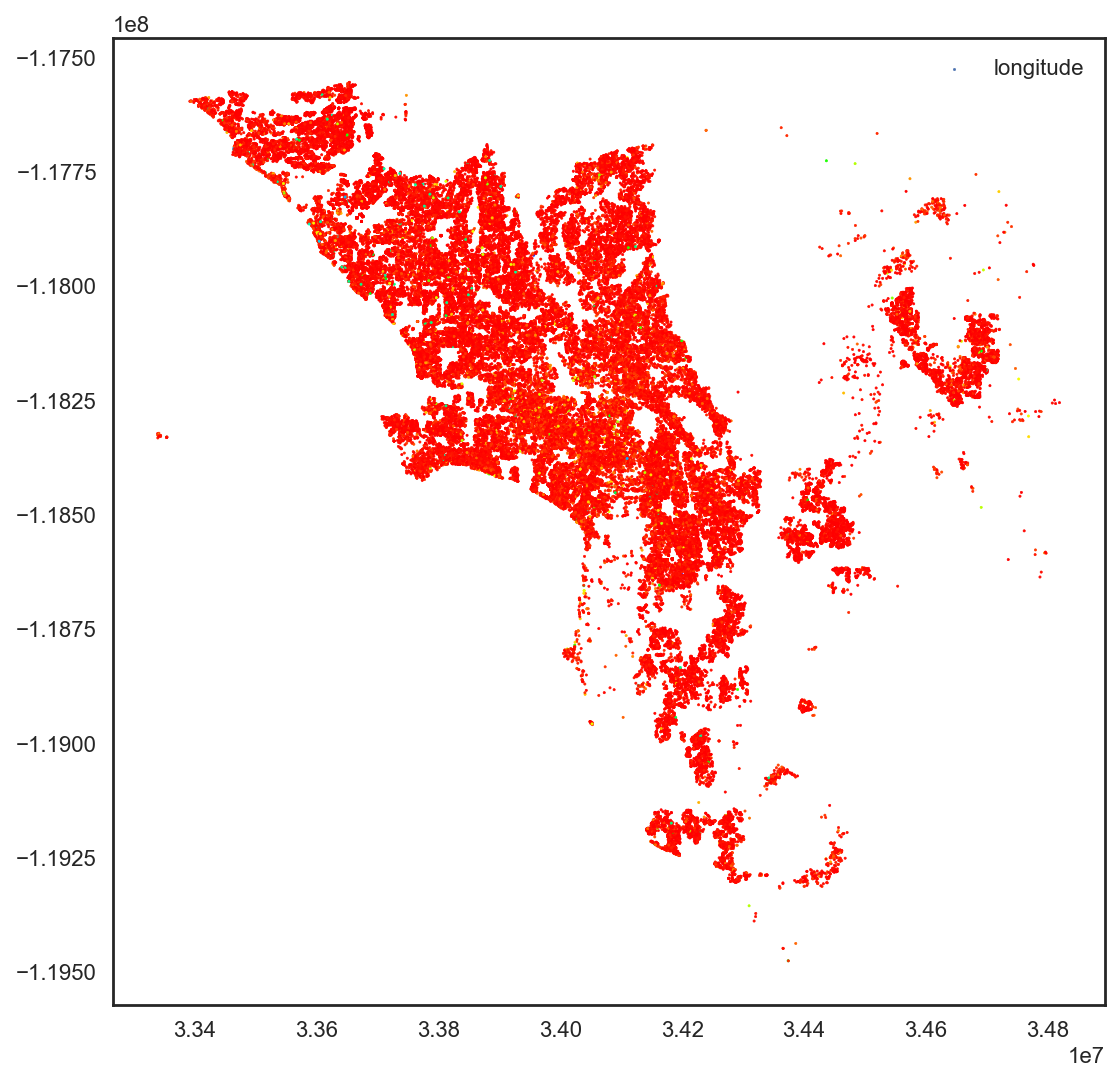

In [144]:
plt.figure(figsize=(8,8), dpi=160)
plt.scatter(train2["latitude"], train2["longitude"], c = abs(train2["logerror_2017"]), s = 1, marker='o', cmap='hsv' )
plt.legend()
plt.show()

C:\Users\Anastasiia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Anastasiia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


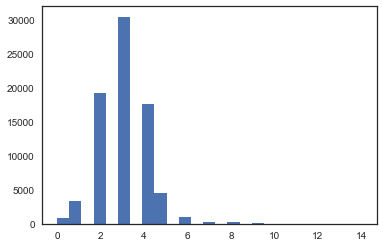

In [139]:
plt.hist(train2["bedroomcnt"], bins = 25, range = [0,14])
plt.show()

In [58]:
zero_rooms = train2.loc[train2['bedroomcnt'] == 0]
zero_rooms.describe()

,parcelid,logerror_2017,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,8.370000e+02,837.000000,168.000000,0.0,0.0,837.000000,837.0,15.000000,243.000000,256.000000,0.0,5.000000,647.000000,343.000000,16.000000,80.000000,5.000000,208.000000,837.000000,18.000000,256.000000,173.000000,173.000000,251.000000,8.370000e+02,8.370000e+02,7.310000e+02,84.0,1.0,0.0,0.0,84.0,837.000000,8.370000e+02,812.000000,837.000000,361.000000,831.000000,837.000000,0.0,1.0,0.0,569.000000,4.000000,0.0,632.000000,211.000000,8.090000e+02,8.370000e+02,837.0,8.360000e+02,837.000000,33.000000,8.130000e+02
mean,1.425158e+07,0.031517,1.428571,NaN,NaN,0.386499,0.0,3.933333,6.633745,1.263672,NaN,1380.600000,1904.335394,1192.317784,1410.500000,2741.862500,1380.600000,2794.341346,6055.315412,1.277778,1.261719,0.161850,9.959538,3.151394,3.392769e+07,-1.182410e+08,4.336450e+04,1.0,440.0,NaN,NaN,1.0,253.500597,6.055534e+07,33406.850985,2285.886499,247181.224377,96583.641396,0.046595,NaN,1.0,NaN,2.579965,285.000000,NaN,1959.882911,1.872038,2.445831e+05,6.349706e+05,2016.0,3.990463e+05,7676.868746,14.121212,6.055728e+13
std,1.079272e+07,0.299595,2.233580,NaN,NaN,0.674393,0.0,0.258199,1.865745,0.615015,NaN,949.078922,1964.212077,1018.429017,112.322156,4344.162988,949.078922,1094.352271,24.431447,0.669113,0.611859,0.454104,75.236709,2.105466,2.465414e+05,4.265020e+05,1.306014e+05,0.0,NaN,NaN,NaN,0.0,31.398642,2.429027e+05,42216.140561,839.715836,149237.644686,455.653577,0.582010,NaN,NaN,NaN,10.210342,74.215901,NaN,26.388159,0.348774,5.848547e+05,1.055979e+06,0.0,6.703358e+05,12605.451846,1.615503,2.435741e+11
min,1.074657e+07,-1.148984,1.000000,NaN,NaN,0.000000,0.0,3.000000,1.000000,1.000000,NaN,420.000000,128.000000,128.000000,1060.000000,600.000000,420.000000,384.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.340822e+07,-1.194374e+08,1.346000e+03,1.0,440.0,NaN,NaN,1.0,31.000000,6.037106e+07,4406.000000,1286.000000,11950.000000,95982.000000,0.000000,NaN,1.0,NaN,1.000000,196.000000,NaN,1890.000000,1.000000,1.290000e+02,7.771000e+03,2016.0,1.217000e+03,106.320000,8.000000,6.037106e+13
25%,1.195365e+07,-0.039758,1.000000,NaN,NaN,0.000000,0.0,4.000000,5.000000,1.000000,NaN,1150.000000,737.000000,501.500000,1416.000000,1281.000000,1150.000000,1968.750000,6037.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.375960e+07,-1.183840e+08,6.009500e+03,1.0,440.0,NaN,NaN,1.0,247.000000,6.037295e+07,12447.000000,1286.000000,118872.000000,96123.000000,0.000000,NaN,1.0,NaN,1.000000,241.000000,NaN,1941.750000,2.000000,6.272600e+04,1.801810e+05,2016.0,8.786775e+04,2313.280000,14.000000,6.037297e+13
50%,1.384734e+07,0.008335,1.000000,NaN,NaN,0.000000,0.0,4.000000,7.000000,1.000000,NaN,1172.000000,1512.000000,820.000000,1440.000000,1824.500000,1172.000000,2685.000000,6059.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.395790e+07,-1.181950e+08,7.908000e+03,1.0,440.0,NaN,NaN,1.0,261.000000,6.059011e+07,25218.000000,2061.000000,268404.000000,96510.000000,0.000000,NaN,1.0,NaN,2.000000,290.000000,NaN,1963.000000,2.000000,1.197630e+05,3.532600e+05,2016.0,1.972700e+05,4357.400000,15.000000,6.059011e+13
75%,1.440353e+07,0.060742,1.000000,NaN,NaN,1.000000,0.0,4.000000

C:\Users\Anastasiia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Anastasiia\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


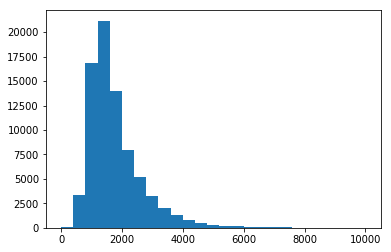

In [60]:
plt.hist(train2["calculatedfinishedsquarefeet"], bins = 25, range = [0,10000])
plt.show()

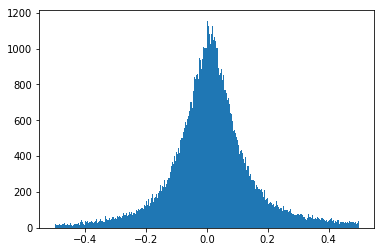

In [80]:
plt.figure()
plt.hist(10**train2["logerror_2017"]-1,bins=300, range=[-0.5,0.5])
plt.show()

In [141]:
plt.figure()
train2_clean.plot(x='transactiondate', y='logerror_2017', style = 'g^')
plt.xlim([2017-01-01, 2017-02-01])
plt.show()

SyntaxError: invalid token (<ipython-input-141-7f8c326ce2ef>, line 3)

In [102]:
path_clean16 = 'C:/Users/Anastasiia/Downloads/X16.csv' #trainset 2016 avec id du bien, date, logerr
dataset_clean16 = pd.read_csv(path_clean16, delimiter=',', header=0, index_col=None)
#df16 = pd.DataFrame(dataset1)
dataset_clean16.describe()
train1_clean = dataset_clean16.copy()
train1_clean["transactiondate"] = pd.to_datetime(dataset_clean16["transactiondate"],format='%Y-%m-%d')
#train1_clean["propertycountylandusecode"]=train1["propertycountylandusecode"].astype(float)
train1_clean.dtypes
#dataset_clean16.dtypes

Unnamed: 0                               int64
parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
fips                                   float64
fullbathcnt                            float64
garagecarcnt                           float64
garagetotalsqft                        float64
heatingorsystemtypeid                  float64
latitude                               float64
longitude                              float64
lotsizesquarefeet                      float64
propertycountylandusecode               object
propertylandusetypeid                  float64
propertyzonin

In [118]:
class myarray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        return np.array(*args, **kwargs).view(myarray)
    def index(self, value):
        return np.where(self == value)
#a = myarray(train1_clean.propertycountylandusecode.unique())
#train1_clean.propertyzoningdesc.unique()
#a[2]
#a.index('010C')
a = pd.DataFrame(train1_clean.propertycountylandusecode.unique())
a.index
#i = np.where(a == value)

RangeIndex(start=0, stop=78, step=1)

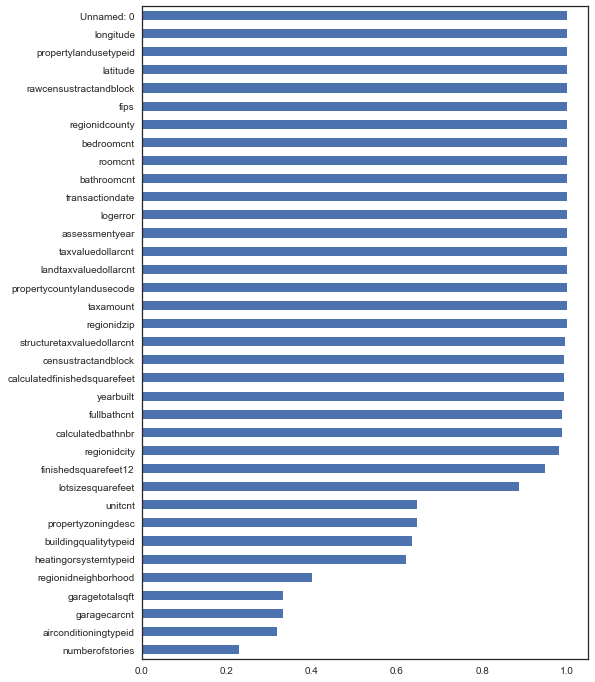

In [142]:
plt.figure(figsize=(8,12))
train1_clean.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.show()
plt.savefig("missing_values.jpg")


In [61]:
train1_clean.parcelid.count()
train1_clean.dtypes==object



Unnamed: 0                      False
parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid           False
bathroomcnt                     False
bedroomcnt                      False
buildingqualitytypeid           False
calculatedbathnbr               False
calculatedfinishedsquarefeet    False
finishedsquarefeet12            False
fips                            False
fullbathcnt                     False
garagecarcnt                    False
garagetotalsqft                 False
heatingorsystemtypeid           False
latitude                        False
longitude                       False
lotsizesquarefeet               False
propertycountylandusecode        True
propertylandusetypeid           False
propertyzoningdesc               True
rawcensustractandblock          False
regionidcity                    False
regionidcounty                  False
regionidneighborhood            False
regionidzip 

C:\Users\Anastasiia\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


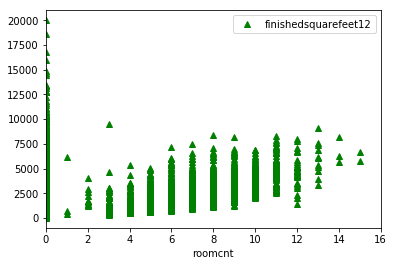

In [51]:
plt.figure()
train1_clean.plot(x='roomcnt', y='finishedsquarefeet12', style = 'g^')
plt.xlim([0, 16])
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [85]:
X = pd.DataFrame(
    np.c_[
        train1_clean['bathroomcnt'], 
        train1_clean['bedroomcnt'], 
        train1_clean['fips']
    ], columns = ['bathroomcnt','bedroomcnt','fips']
)
Y = train1_clean['logerror']

In [95]:
Y

0        0.0276
1       -0.1684
2       -0.0040
3        0.0218
4       -0.0050
5       -0.2705
6        0.0440
7        0.1638
8       -0.0030
9        0.0843
10       0.3825
11      -0.0161
12       0.0344
13       0.0816
14      -0.0450
15       0.0020
16       0.0440
17      -0.0419
18      -0.0020
19       0.0100
20      -0.0387
21       0.0218
22       0.0149
23       0.1151
24      -0.1696
25      -0.0440
26      -0.0747
27       0.0080
28       0.0010
29      -0.0534
          ...  
90245    0.0953
90246    0.0139
90247    0.2095
90248    0.0080
90249   -0.1312
90250    0.0421
90251    0.0658
90252    0.0030
90253   -0.0294
90254   -0.0111
90255    0.0070
90256    0.0218
90257    0.0526
90258    0.0889
90259    0.0178
90260    0.0237
90261    0.0431
90262   -0.2231
90263    0.1398
90264    0.0478
90265   -0.3769
90266   -0.0030
90267    0.0010
90268   -0.0151
90269    0.0344
90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
90274    0.4207
Name: logerror, Length: 

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(72220, 3)
(18055, 3)
(72220,)
(18055,)


In [87]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.15872453980143464
R2 score is 0.0009867060188512022




In [89]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.16981094981134837
R2 score is 0.0007064487251293716


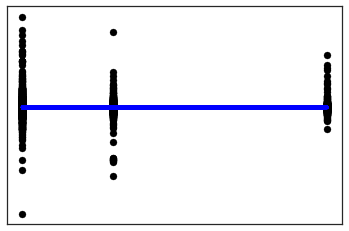

In [90]:
plt.figure()
plt.scatter(X_test['fips'], Y_test,  color='black')
plt.plot(X_test['fips'], y_test_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [91]:
train1_clean.fips.unique()

array([ 6037.,  6059.,  6111.])

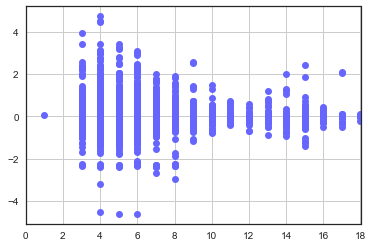

In [131]:
nancnt = train1_clean.isnull().sum(axis=1)
logerr = train1_clean["logerror"]
plt.figure()
plt.plot(nancnt, logerr, c = '#6666ff', marker = 'o', linewidth=0)
plt.xlim([0, 18])
plt.grid()
plt.show()
#nancnt.describe()